# Вычислительное дз №2 по случайным процессам

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, List


## Винеровский процесс. Метод Монте-Карло

### Задача № 1

#### a)

In [136]:
# Parameters
P0 = 100  # Начальная цена актива
r = 0.0  # ставка по безрисковому активу
T = 1  # временной интервал [0,1]
N = 10000
n = 100  # число шагов на интервале


dt = T / (n - 1) # Диаметр разбиения отрезка


In [137]:
def make_wiener_simulation(N: int, n: int, dt: float):
  # функция для генерации набора винеровских процессов
  wiener_processes = np.zeros(shape=(N, n)) # набор всех винеровсих процессов
  for i in range(N):
    random_variables = np.random.normal(loc=0, scale = np.sqrt(dt), size=n)
    wiener_process = np.cumsum(random_variables)
    wiener_processes[i, ] = wiener_process
  return wiener_processes


In [138]:
wiener_processes = make_wiener_simulation(N, n, dt)

In [139]:
wiener_processes[1,]

array([ 0.19318896,  0.19959387,  0.19960762,  0.23103182,  0.18714921,
        0.12565092,  0.27200291,  0.33318828,  0.28619914,  0.31280354,
        0.28237927,  0.23362649,  0.249402  ,  0.25034451,  0.25737092,
        0.25157096,  0.31724412,  0.19328107,  0.27035067,  0.46602489,
        0.33245026,  0.20884256,  0.12004996,  0.08488773,  0.10384542,
        0.10734577,  0.09955299, -0.03395201, -0.02768221, -0.10790791,
        0.17483257,  0.30570248,  0.43857299,  0.44186133,  0.46184044,
        0.43201687,  0.40878374,  0.34722728,  0.17244235,  0.05781068,
       -0.00735942,  0.14846413,  0.11906265,  0.00650943, -0.15514654,
       -0.18335476, -0.12469029, -0.21240069, -0.22029464, -0.06076915,
       -0.05918361, -0.28106881, -0.21950475, -0.28526355, -0.27288884,
       -0.25549559, -0.20163935, -0.3982303 , -0.35241951, -0.1714129 ,
       -0.26645605, -0.17083269, -0.12483375,  0.0158892 ,  0.01456916,
       -0.08177925, -0.10326233,  0.00371952, -0.09985725, -0.21

In [140]:
# Теперь посчитаем среднее и дисперсию в конце временного интервала
w_1 = wiener_processes[:, -1]
sample_mean_w_1 = np.mean(w_1)
sample_var_w_1 = np.var(w_1)

In [141]:
print(f"Выборочное среднее: {sample_mean_w_1} \nВыборочная дисперсия {sample_var_w_1}")
# Можно увидеть, что w_t асимптотически стремится -> N(0, t) -> N(0, 1)

Выборочное среднее: -0.008033633181844874 
Выборочная дисперсия 1.0095190359123825


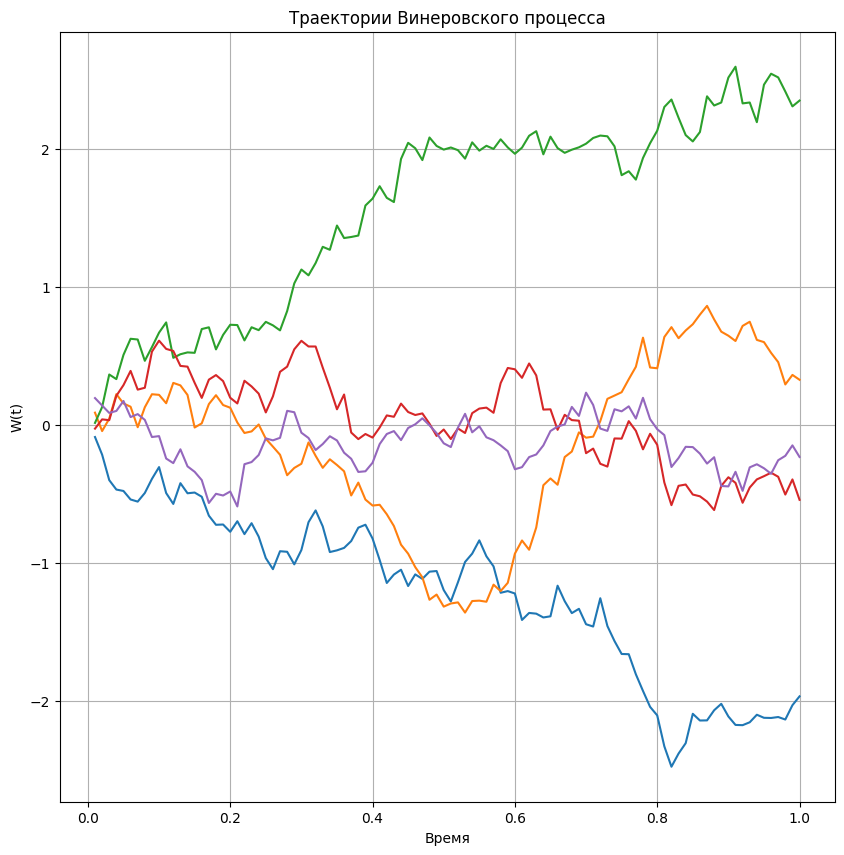

In [142]:
# Теперь построим 5 случайных траекторий

#Генерируем интервал i/n [0,1]
t = np.arange(1, n+1)/n

figure, ax = plt.subplots(figsize=(10, 10))
for i in range(5):
    plt.plot(t, wiener_processes[np.random.choice(N), :])

plt.title("Траектории Винеровского процесса")
plt.xlabel("Время")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()


#### b)

In [143]:
def count_mean_sign_changes(w):
  # функция для удобного подсчета среднего числа изменений знака в наборе случайных процессов
  overall_sign_changes = []

  for process in w:
    positive = process > 0

    sign_changes = np.logical_xor(positive[1:], positive[:-1]).sum()

    overall_sign_changes.append(sign_changes)


  return np.mean(overall_sign_changes)

In [144]:
# посчитаем для изначальной симуляции
count_mean_sign_changes(wiener_processes)

5.6221

In [145]:
diameters = [25, 38, 60, 154, 120, 200, 20, 190] # Возьмем разное число шагов

In [146]:
for diam in diameters:
  dt = T / (n - 1) # Диаметр разбиения отрезка
  wiener_processes = make_wiener_simulation(N, n, dt) # генерируем набор винеровских процессов
  sign_changes = count_mean_sign_changes(wiener_processes) # считаем число изменений знаков для данного диаметра разбеения
  print(sign_changes)

# как видим, число изменений знаков слабо отличается в случае смены диаметров разбиения

5.7028
5.6224
5.7063
5.6872
5.6603
5.7068
5.633
5.6406


#### c)

<b> По условию $ r_t = ln(p_t/p_0) $, отсюда следует, что  $ e^{r_t} = p_1/p_0 $ или $p_t = e^{r_t} * p_0 $, так как $r_t$ определяется винеровским процессом, который в кажый момент времени представляет из себя нормальное распределение, то тогда $e^{r_t}$ имеет логнормальное распределение и, следовательно, $p_1 = e^{r_1} * p_0 $ тоже имеет логнормальное распределение (т.к $p_0$ константа) </b>

<b> Параметры логнормального распределения выражаются через параметры нормального распределения следующим образом:
 $ \mu_{\text{log}} = e^{μ+ σ^2 / 2}  $ и $var_{\text{log}} =(e^{σ^2} − 1)*e^{2μ + σ^2}$
</b>

<b> В нашем случае $\mu$ = 0 и $σ^2$ = 1 => $\mu_{\text{log}} = e^{1/2} $ и $var_{\text{log}} = (e - 1) * e^{1} $ </b>

In [147]:
mu_log = np.exp(0.5)
mu_var = (np.exp(1) - 1)*np.exp(1)

# В таком случае для p_1
p_1_mu = P0*mu_log
p_1_var = P0**2 * mu_var

print(f"Математическое ожидание p1: {p_1_mu}\nДисперсия p_1:{p_1_var}")

Математическое ожидание p1: 164.87212707001282
Дисперсия p_1:46707.74270471604


#### d)

In [148]:
wiener_processes = make_wiener_simulation(N, n, dt)
w_1 = wiener_processes[:, -1]
p_1 = np.exp(w_1) * P0
p_1

array([ 73.22534601,  22.35775622,  44.68591436, ...,  58.70803712,
       207.42964794, 169.22071918])

In [149]:
p_1_sample_mean = np.mean(p_1)
p_1_sample_var = np.var(p_1)
print(f"Выборочное среднее: {p_1_sample_mean} \nВыборочная дисперсия {p_1_sample_var}")
# как видим результат примерно совпадает с теоретическим

Выборочное среднее: 168.00357658238877 
Выборочная дисперсия 54670.25304872403


#### e)

<b> Прибыль составит $ p_1 - k = e^{r_1} * p_0 - k $ </b>

In [150]:
k = 102 # цена исполнения европейского колл опциона
profit = p_1 - k
print(f"Выборочное среднее прибыли: {np.mean(profit)} \nВыборочная дисперсия прибыли {np.var(profit)}")

Выборочное среднее прибыли: 66.00357658238877 
Выборочная дисперсия прибыли 54670.25304872403


In [151]:
from scipy.stats import norm
# Сравним с моделью Блэка-Шоулза
d1 = np.log(P0 / k) + 1/2
d2 = np.log(P0 / k) - 1/2
black_scholes_price = P0 * norm.cdf(d1) - k * np.exp(-r * T) * norm.cdf(d2) # текущая стоимость европейского call опциона

black_scholes_profit = black_scholes_price - k

print(f"Значение цены по модели Блэка-Шоулза: {black_scholes_price}")
print(f"Значение прибыли по модели Блэка-Шоулза: {black_scholes_profit}")
# получается, что цена по Блэка-Шоулза примерно в 2 раза меньше прибыли по предыдущей симуляции

Значение цены по модели Блэка-Шоулза: 37.68238871102574
Значение прибыли по модели Блэка-Шоулза: -64.31761128897426


## Мартингалы, связанные с винеровским процессом

In [152]:
T = 1  # временной интервал [0,1]
N = 10000
n = 100  # число шагов на интервале
dt = T / (n - 1) # Диаметр разбиения отрезка

In [153]:
def count_martingal_mean_diff(w_t, t):
  # функция для подсчета средней разницы между X1 - Xt0
  t0 = np.random.choice(t)
  x_t0 = w_t[:, int(t0*10)]
  x_1 = w_t[:, -1]
  return np.mean(x_1 - x_t0)

In [154]:
wiener_processes = make_wiener_simulation(N, n, dt)

In [155]:
#Генерируем интервал i/n [0,1]
t = np.arange(1, n+1)/n


<b> 1) $X_t = W_t^2 - t^2 $ </b>

In [156]:
x1 = wiener_processes**2 - t**2

In [157]:
count_martingal_mean_diff(x1, t)

-0.046069026934434376

<b> $2) X_t = e^{W_t-t/2}$</b>

In [158]:
x2 = np.exp(wiener_processes - t/2)

In [159]:
count_martingal_mean_diff(x2, t)

0.03184264922021331

<b>$3) X_t = e^{t/2}*sin(W_t) $</b>

In [160]:
x3 = np.exp(t/2) * np.sin(wiener_processes)

In [161]:
count_martingal_mean_diff(x3, t)

0.013609927646538594

<b> $4)X_t = (W_t + t)*e^{-W_t-t/2}$ </b>

In [162]:
x4 = (wiener_processes + t) * np.exp(-wiener_processes - t/2)

In [163]:
count_martingal_mean_diff(x4, t)

-0.040211047029818335

#### Как видим во всех случаях разность $X_1 - X_{t0} $ стремится к нулю, что говорит о мартингальности

## Интегралы от винеровского процесса

In [164]:
from scipy.stats import kstest #тест Колмогорова-Смирнова

T = 1  # временной интервал [0,1]
N = 10000
n = 100  # число шагов на интервале
dt = T / (n - 1) # Диаметр разбиения отрезка

wiener_processes = make_wiener_simulation(N, n, dt)


In [165]:
def ito_integral(g, t, w_t):
  # функция для расчета интеграла Ито с функцией g и винеровским процессом w_t
  ito_integral = np.zeros(w_t.shape)
  for i in range(len(w_t)-1):
    ito_integral[i] += g(t[i], w_t[i]) - (w_t[i+1] - w_t[i])
  return ito_integral

In [166]:
def plot_random_processes(N, t, random_processes, n=5) -> None:
  figure, ax = plt.subplots(figsize=(12, 12))
  for i in range(n):
    ax.plot(t, random_processes[np.random.choice(N), :])
  plt.title("Траектории случайного процесса процесса")
  plt.xlabel("Время")
  plt.ylabel("process(t)")
  plt.grid(True)
  plt.show()


#### a)


In [167]:
def g(t, w_t):
  return t**2

In [168]:
ito_process = np.array([ito_integral(g, t, w_t) for w_t in wiener_processes])


In [169]:
ito_process.shape

(10000, 100)

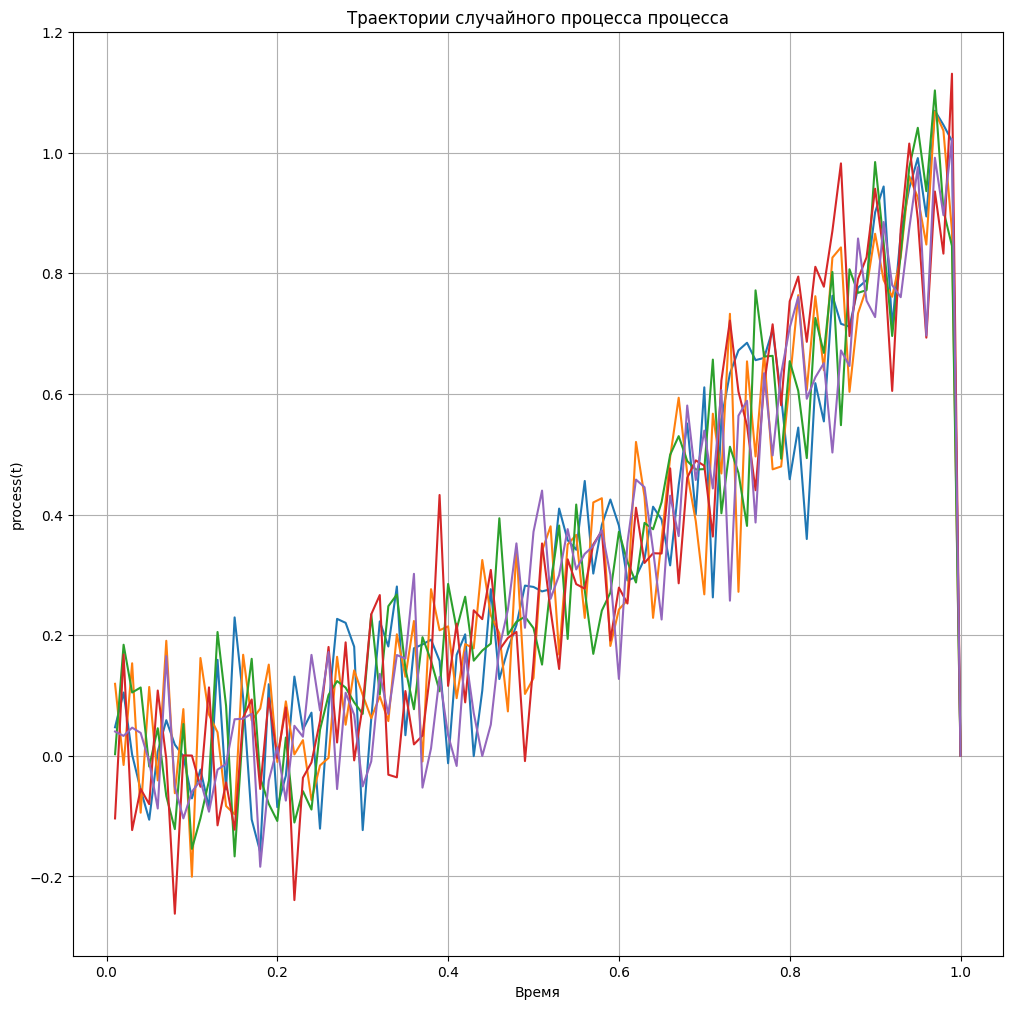

In [170]:
plot_random_processes(N, t, ito_process, n=5)

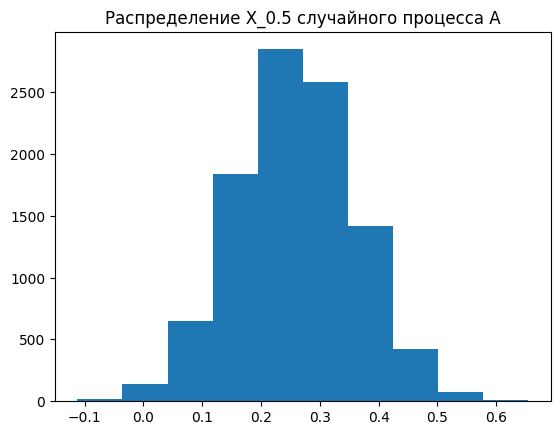

In [171]:
x_half = ito_process[:, 50]
plt.hist(x_half)
plt.title("Распределение X_0.5 случайного процесса A")
plt.show()

In [172]:
#Сделаем тест Колмогорова-Смирнова для проверки нормальности распределеия случайной величины x_0.5
ks_stat, p_value = kstest(x_half, 'norm', args=(np.mean(x_half), np.std(x_half)))
print(f"Случайный процесс A в точке  0.5 - Статистика Колмогорова-Смирнова: {ks_stat:.4f}, p-value: {p_value:.4f}")

Случайный процесс A в точке  0.5 - Статистика Колмогорова-Смирнова: 0.0039, p-value: 0.9977


#### b)

In [173]:
def g(t, w_t):
  return 1/(1-t)

In [174]:
ito_process = (1-t)*np.array([ito_integral(g, t, w_t) for w_t in wiener_processes])

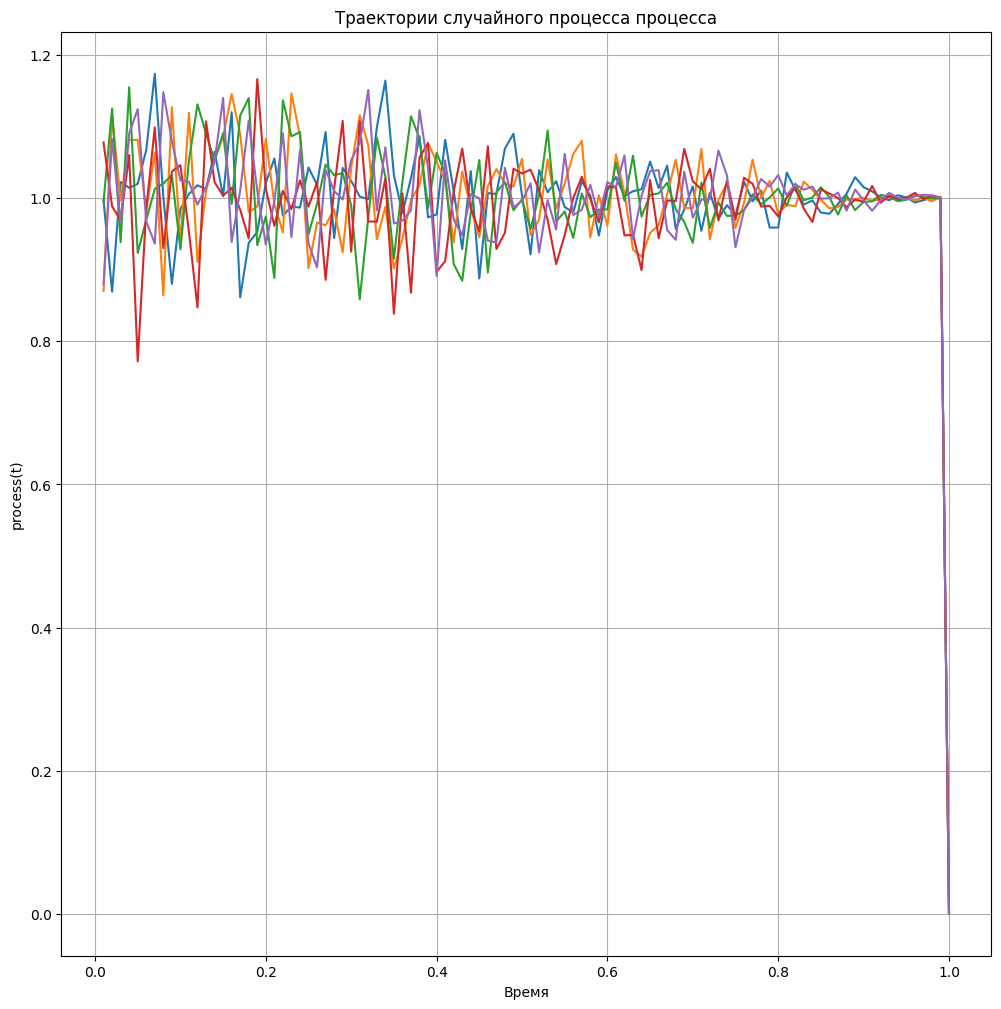

In [175]:
plot_random_processes(N, t, ito_process, n=5)

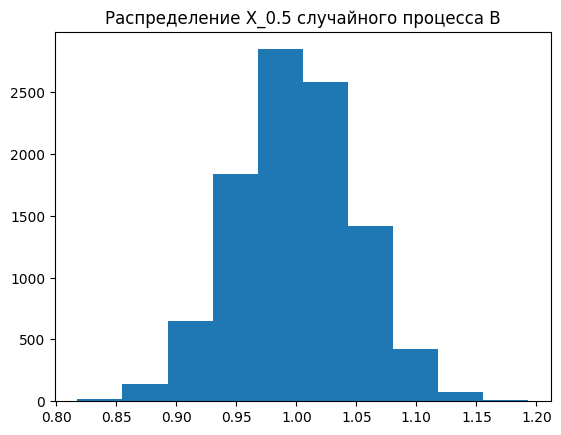

In [176]:
x_half = ito_process[:, 50]
plt.hist(x_half)
plt.title("Распределение X_0.5 случайного процесса B")
plt.show()

In [177]:
# Сделаем тест Колмогорова-Смирнова для проверки нормальности распределеия случайной величины x_0.5
ks_stat, p_value = kstest(x_half, 'norm', args=(np.mean(x_half), np.std(x_half)))
print(f"Случайный процесс B в точке  0.5 - Статистика Колмогорова-Смирнова: {ks_stat:.4f}, p-value: {p_value:.4f}")

Случайный процесс B в точке  0.5 - Статистика Колмогорова-Смирнова: 0.0039, p-value: 0.9977


#### c)

In [178]:
def g(t, w_t):
  return w_t**2

In [179]:
ito_process = np.array([ito_integral(g, t, w_t) for w_t in wiener_processes])

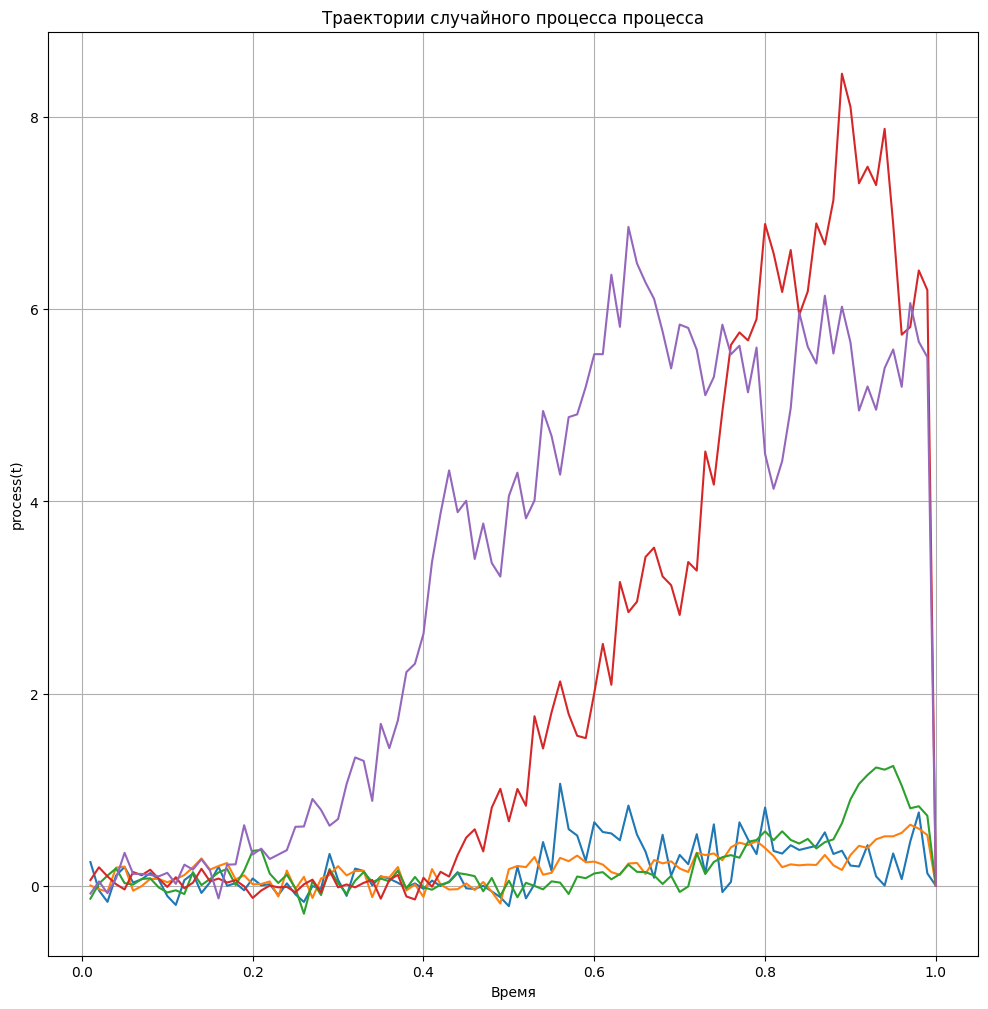

In [180]:
plot_random_processes(N, t, ito_process, n=5)

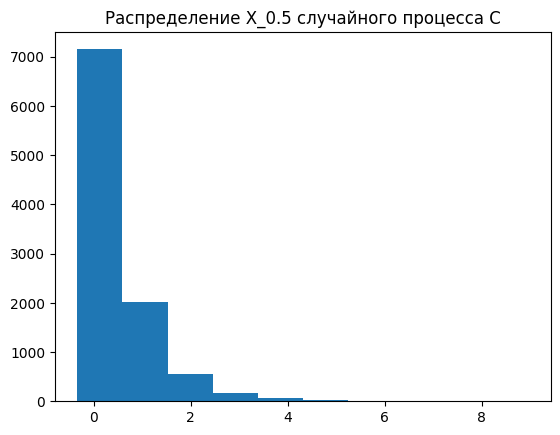

In [181]:
x_half = ito_process[:, 50]
plt.hist(x_half)
plt.title("Распределение X_0.5 случайного процесса C")
plt.show()

In [182]:
# Сделаем тест Колмогорова-Смирнова для проверки нормальности распределеия случайной величины x_0.5
ks_stat, p_value = kstest(x_half, 'expon', args=(np.mean(x_half), np.std(x_half)))
print(f"Случайный процесс C в точке  0.5 - Статистика Колмогорова-Смирнова: {ks_stat:.4f}, p-value: {p_value:.4f}")

Случайный процесс C в точке  0.5 - Статистика Колмогорова-Смирнова: 0.6779, p-value: 0.0000
